# PDAN8411 – Part 2: Classification and Model Improvement
## Student: Maximilian Walsh | Student No: ST10203070
## Module: Programming for Data Analytics

---

## Import Libraries and Load Dataset

#### We begin by importing essential libraries, Pandas, Numpy, Matplotlib, and Seaborn for data analysis and loading the dataset into a Pandas DataFrame.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data.csv")  

## Data Inspection Block

In [11]:
# Check shape and column names
print("Shape of dataset:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())

# Check target variable distribution
print("\nTarget value counts:")
print(df['diagnosis'].value_counts())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check data types
print("\nData types:")
print(df.dtypes)

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Preview the first few rows
df.head()

Shape of dataset: (569, 33)

Column names:
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

Target value counts:
diagnosis
B    357
M    212
Name: count, dtype: int64

Missing values in each column:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean       

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 1. Justification of Dataset Choice

The selected dataset is the **Breast Cancer Wisconsin (Diagnostic) Dataset**, which is publicly available and commonly used for classification tasks. It is well-suited for this project based on the following factors:

- **Relevance to the Task**:  
  The dataset enables binary classification between malignant (`M`) and benign (`B`) breast tumors, which aligns directly with the goal of identifying patients eligible for cancer-related benefits under the medical scheme (Learning & Ovsen, 2016).

- **Balanced Target Distribution**:  
  The `diagnosis` column contains 357 benign and 212 malignant cases, providing enough representation from both classes to support effective model training and evaluation (Learning & Ovsen, 2016).

- **Clean and Complete Data**:  
  - No missing values were found in the predictive features.  
  - The `Unnamed: 32` column contains only missing values and will be safely dropped.  
  - The `id` column is an identifier and not useful for modeling, so it will also be removed.

- **Well-Structured Numerical Features**:  
  The dataset includes 30 numerical features extracted from digitized images of breast mass biopsies(Learning & Ovsen, 2016). These include statistical measurements (mean, standard error, and worst) of tumor characteristics such as radius, texture, smoothness, and compactness—relevant and interpretable in a clinical context(Learning & Ovsen, 2016).

- **Sufficient Size**:  
  With 569 records, the dataset is large enough to allow for robust training and testing of a machine learning model, while remaining lightweight and easy to process(Learning & Ovsen, 2016).

- **Consistent Data Types**:  
  All predictors are `float64` numeric values, ensuring compatibility with preprocessing and machine learning pipelines without additional type handling(Learning & Ovsen, 2016).

In summary, this dataset is clean, relevant, interpretable, and well-balanced. Making it a high-quality and suitable foundation for building a classification model to support early cancer detection(Learning & Ovsen, 2016).


## 2. Justification of Algorithm Choice

Given the objective of classifying whether a tumor is malignant (`M`) or benign (`B`), this problem is clearly a binary classification task(Learning & Ovsen, 2016). The dataset consists of continuous numerical features and a moderately balanced target variable, which provides flexibility in algorithm selection (Muller & Guido, 2016). After evaluating several options, the chosen algorithm for initial modeling is:

### Logistic Regression

**Reasons for choosing Logistic Regression:**

- **Interpretability**:  
  Logistic regression provides easily interpretable coefficients that show the relationship (positive or negative) between each feature and the likelihood of malignancy (Muller & Guido, 2016). This is especially important in medical contexts where practitioners may need to explain model outputs (Schober & Vetter, 2021).

- **Baseline Performance**:  
  As a fundamental classification method, logistic regression is ideal for establishing a baseline (Muller & Guido, 2016). It enables quick evaluation of how well the features separate the classes without complex tuning (Muller & Guido, 2016).

- **Efficient Training**:  
  Logistic regression trains very quickly and performs well on datasets where features are numerical and linearly separable to a degree, such conditions are met by the cancer dataset (Muller & Guido, 2016).

- **Probabilistic Output**:  
  The model returns probabilities of class membership, allowing the medical scheme to apply thresholds with flexibility depending on sensitivity (catching all possible malignancies) vs. specificity (avoiding false positives) (OpenAI, 2025).

- **Robust to Noise and Scalable**:  
  Logistic regression can handle multicollinearity reasonably well (especially when regularized), and its linear nature reduces the risk of overfitting when data is not excessively complex (Muller & Guido, 2016).

---

**Why not other models first?**

- **Decision Trees** and **Random Forests** offer better performance in many cases but are more complex and require tuning. They may be introduced after establishing a baseline (OpenAI, 2025).
- **Support Vector Machines (SVMs)** work well on smaller datasets but are harder to interpret (Muller & Guido, 2016).
- **K-Nearest Neighbors (KNN)** is simple but sensitive to feature scaling and becomes computationally expensive with larger datasets (Muller & Guido, 2016).

---

In summary, **logistic regression** is selected as the initial model for its clarity, speed, and suitability for healthcare-related decision-making (OpenAI, 2025). Once the baseline is established, other non-linear models may be considered or regularisation adjustments will be introduced to improve performance further (OpenAI, 2025).


## 3. Analysis Planning

Before model training, it is essential to develop a structured plan to ensure the data is clean, the most relevant features are used, the model is appropriately trained, and the results are effectively evaluated.

---

### 3a. Exploratory Data Analysis (EDA) Plan

The EDA will focus on understanding data structure, distribution, and relationships between features and the target variable.

Planned steps:

- Remove irrelevant or redundant columns (`id`, `Unnamed: 32`)
- Encode the target variable (`diagnosis`) as binary (M = 1, B = 0)
- Plot the distribution of the target variable (bar chart)
- Plot boxplots for key features to assess skewness and outliers
- Generate a correlation heatmap to identify multicollinearity or relationships with the target

---

### 3b. Feature Selection Plan

To improve model performance and reduce overfitting, we will identify the most informative features using (Suzanne, 2023):

- **Correlation analysis**: Select features most strongly associated with the target
- **Recursive Feature Elimination (RFE)**: Identify top predictive features for logistic regression

Aiming to find a balance between model simplicity and predictive power (Suzanne, 2023).

---

### 3c. Model Training Plan

A **Logistic Regression** model will be implemented using scikit-learn, with the following plan (Muller & Guido, 2016):

- Train-test split (80/20)
- Standardize features using StandardScaler to ensure fair coefficient interpretation
- Use default hyperparameters initially
- Optionally apply L2 regularization (Ridge) if overfitting is suspected
- Save baseline metrics for comparison against future models

---

### 3d. Model Evaluation Plan

The model will be evaluated using appropriate classification metrics (Muller & Guido, 2016):

- **Accuracy**: Overall proportion of correct predictions
- **Precision**: Correctly predicted malignant cases over all predicted malignant
- **Recall (Sensitivity)**: Correctly predicted malignant cases over all actual malignant
- **F1-score**: Harmonic mean of precision and recall
- **Confusion Matrix**: Visual summary of prediction types
- **ROC Curve and AUC**: To assess class separation power of the model

These metrics are chosen due to the clinical importance of identifying all true positive (malignant) cases, while minimizing false positives (OpenAI, 2025).

---

### 3e. Report Structure Plan

The final report will include:

1. **Introduction**: Problem context and dataset overview  
2. **Dataset Justification**: Justifying the dataset chosen
3. **Algorithm Justification**: Justifying the algorithm chosen
4. **EDA Findings**: Visual summaries and key insights  
5. **Modeling Process**: Feature selection, training approach, parameter choice  
6. **Evaluation Results with visuals**: Metrics, confusion matrix, ROC/AUC  
7. **Model Retraining**: Evaluation of retrained model with same metrics and visuals as initial model's evaluation
8. **Recommendations**: Summary of model performance and suggestions for future deployment or improvements  

## 4. Conducting Analysis

Now we will conduct the analyse where we will complete an exploratory data analysis, work throigh feature selection, and train the model.

---

### 4a. Exploratory Data Analysis (EDA)

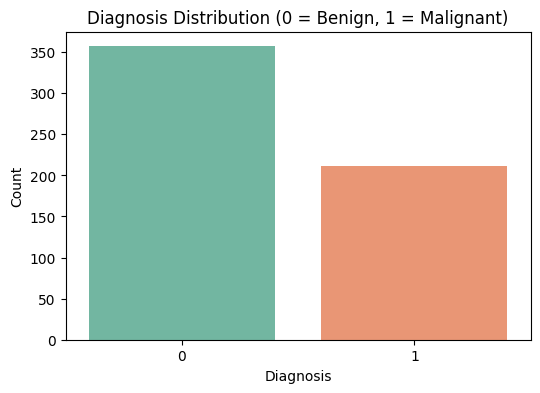

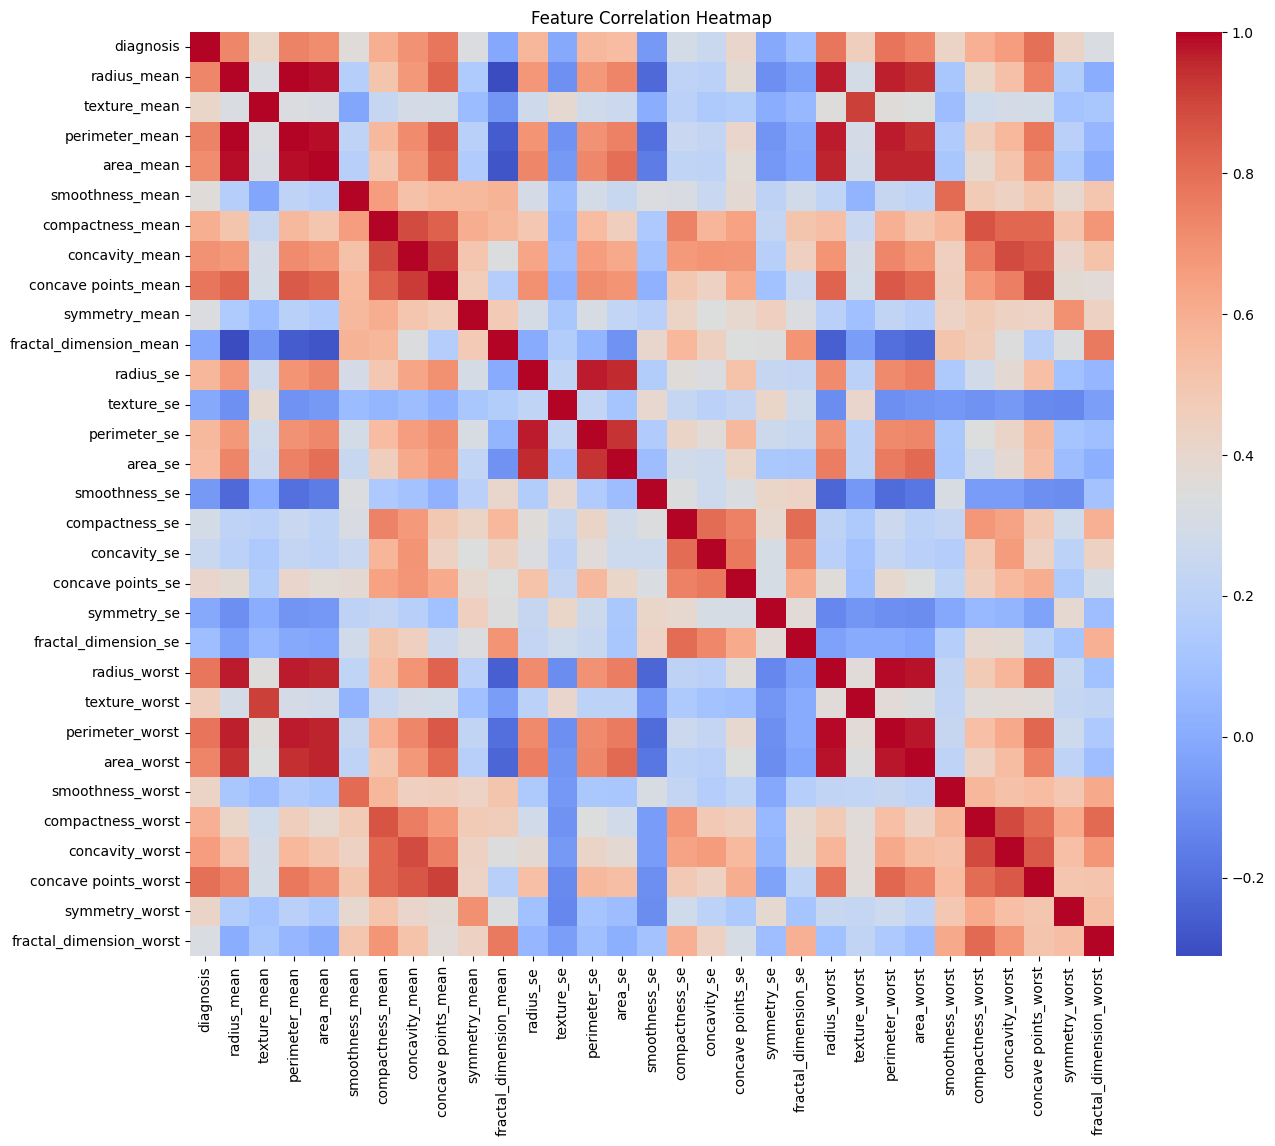

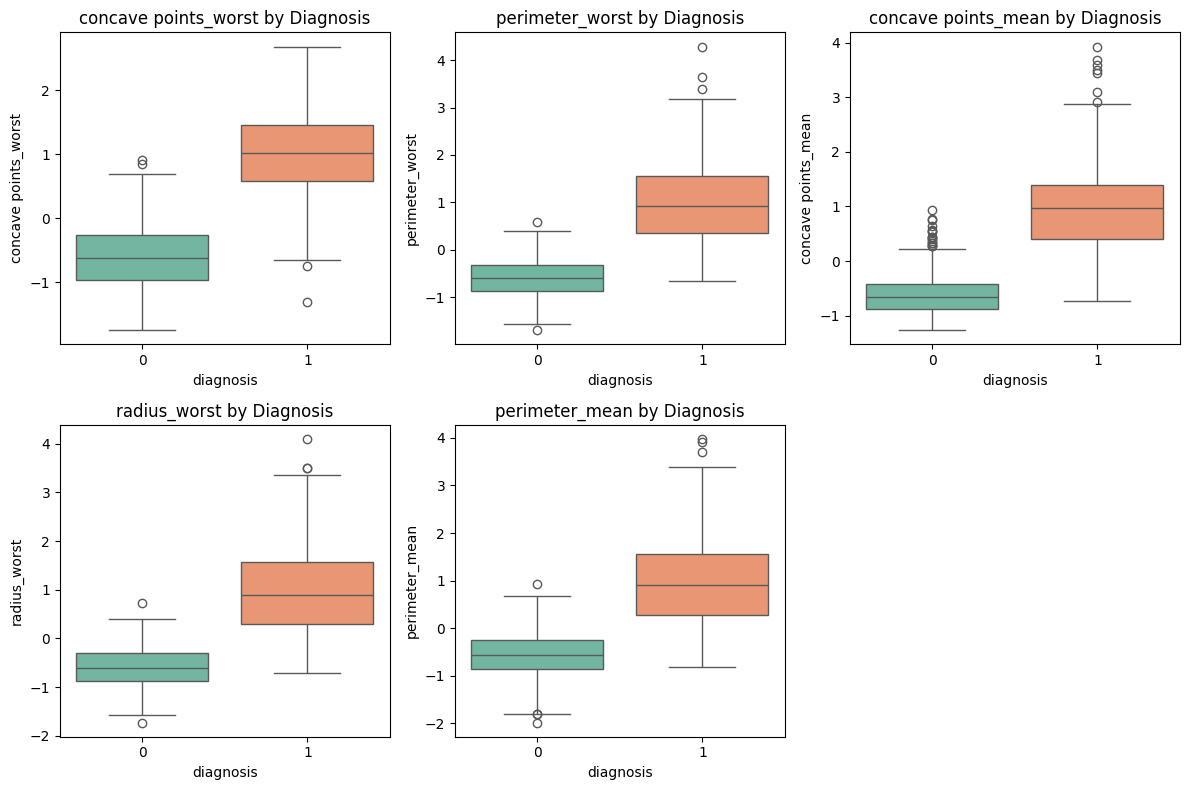

In [12]:
# Import standard libraries for data processing and visualization
from sklearn.preprocessing import StandardScaler

# Drop irrelevant columns
df.drop(columns=['id', 'Unnamed: 32'], inplace=True, errors='ignore')

# Encode the diagnosis column (M = 1, B = 0)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Visualize class distribution (malignant vs. benign)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='diagnosis', hue='diagnosis', palette='Set2', legend=False)
plt.title('Diagnosis Distribution (0 = Benign, 1 = Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Generate correlation heatmap to assess feature relationships
plt.figure(figsize=(16, 12))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

# Standardize feature values for fair comparison in plots
features = df.drop('diagnosis', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Create a scaled DataFrame and reattach the target variable
df_scaled = pd.DataFrame(X_scaled, columns=features.columns)
df_scaled['diagnosis'] = df['diagnosis']

# Identify top 5 features most correlated with the target variable
top_features = corr['diagnosis'].abs().sort_values(ascending=False)[1:6].index.tolist()

# Plot boxplots to compare top features across diagnosis classes
plt.figure(figsize=(12, 8))
for i, col in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_scaled, x='diagnosis', y=col, hue='diagnosis', palette='Set2', legend=False)
    plt.title(f'{col} by Diagnosis')
plt.tight_layout()
plt.show()


**1. Diagnosis Class Distribution**  
The bar chart reveals that the dataset contains **212 malignant (1)** and **357 benign (0)** cases. Although slightly imbalanced, both classes are well represented, allowing reliable supervised classification (OpenAI, 2025).

**2. Feature Correlation Heatmap**  
The heatmap shows that several features are strongly correlated with the diagnosis outcome. Notably (OpenAI, 2025):  
- `radius_mean`, `perimeter_mean`, and `concave points_mean` have high positive correlations with malignancy.  
- Many "worst" features (e.g., `radius_worst`, `concavity_worst`) also show strong diagnostic value.  
This insight helps prioritize features for model training.

**3. Boxplots by Diagnosis**  
Standardized boxplots further highlight feature distribution differences between benign and malignant tumors (OpenAI, 2025):  
- Malignant cases exhibit higher values for `concave points_worst`, `perimeter_worst`, and `radius_worst`.  
- Benign tumors cluster lower across these metrics.  
This suggests clear separability between classes based on shape-related features, supporting their inclusion in the model.

---

### 4b. Feature Selection

After conducting the exploratory data analysis (EDA), we proceed to the feature selection stage. This step is crucial for improving model performance, reducing overfitting, and enhancing interpretability (Muller & Guido, 2016).

The process is structured as follows:

1. **Remove Irrelevant or Redundant Columns**  
   - The `id` column serves only as a unique identifier and holds no predictive value.
   - The `Unnamed: 32` column is completely empty and should be dropped.

2. **Encode the Target Variable**  
   - The `diagnosis` column contains categorical values M (Malignant) and B (Benign).
   - These are mapped to binary values where M = 1 and B = 0 for use in classification algorithms.

3. **Correlation Filtering**  
   - Features that exhibit high multicollinearity (correlation > 0.9) with other predictors are considered redundant (Muller & Guido, 2016).
   - From each pair of highly correlated features, one is dropped to avoid duplication of information and to simplify the model (Suzanne, 2023).

4. **Recursive Feature Elimination (RFE)**  
   - We use Logistic Regression as the estimator to perform RFE (Suzanne, 2023).
   - RFE iteratively removes less important features based on model weights, retaining only the most predictive variables (Suzanne, 2023).
   - For this task, we aim to keep the top 10 features identified through RFE.

This multistep process helps ensure the dataset is both informative and efficient for model training.

In [13]:
# Import necessary modules for model training and feature selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Reload and preprocess data
df = pd.read_csv("data.csv")
df.drop(columns=['id', 'Unnamed: 32'], inplace=True, errors='ignore')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.dropna(subset=['diagnosis'], inplace=True)

# Filter out highly correlated features to reduce redundancy
corr_matrix = df.drop(columns='diagnosis').corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
df_reduced = df.drop(columns=to_drop)

#  Use RFE to select the top 10 predictive features for logistic regression
X = df_reduced.drop(columns='diagnosis')
y = df_reduced['diagnosis']

# Apply Recursive Feature Elimination (RFE) using logistic regression to select the top 10 predictive features
model = LogisticRegression(max_iter=10000, solver='liblinear')
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

# Keep only the selected features for training
selected_features = X.columns[rfe.support_]
X = X[selected_features]

print("Top 10 Selected Features:\n", selected_features.tolist())

Top 10 Selected Features:
 ['radius_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'compactness_se', 'concavity_se', 'compactness_worst', 'concavity_worst']


#### To optimize model performance and reduce multicollinearity, the following two-step feature selection process was implemented:

---

#### 1. Correlation Filtering  
A Pearson correlation matrix was calculated for all numeric features (excluding the target) (OpenAI, 2025). Features exhibiting high multicollinearity (correlation > 0.90 with another feature) were removed (Muller & Guido, 2016). These were considered redundant, as they provide overlapping predictive power (Muller & Guido, 2016).

**Dropped due to high correlation:**
- `perimeter_mean`
- `area_mean`
- `concave points_mean`
- `perimeter_se`
- `area_se`
- `radius_worst`
- `texture_worst`
- `perimeter_worst`
- `area_worst`
- `concave points_worst`

This reduced the number of features from 30 to 20 while maintaining the diversity of measurements.

---

#### 2. Recursive Feature Elimination (RFE)  
Logistic Regression was used as the estimator to perform RFE. This process ranks features by their contribution to prediction accuracy and recursively eliminates the least important ones until the optimal subset remains (Muller & Guido, 2016).

**Top 10 features selected by RFE:**
- `radius_mean`
- `concavity_mean`
- `symmetry_mean`
- `fractal_dimension_mean`
- `radius_se`
- `texture_se`
- `compactness_se`
- `concavity_se`
- `compactness_worst`
- `concavity_worst`

These features will be used in the final model training step.

---

### 4c. Model Training


Model Performance Metrics:
Accuracy: 0.9649
Precision: 0.9535
Recall: 0.9535
F1 Score: 0.9535
AUC Score: 0.9971

Confusion Matrix:
 [[69  2]
 [ 2 41]]


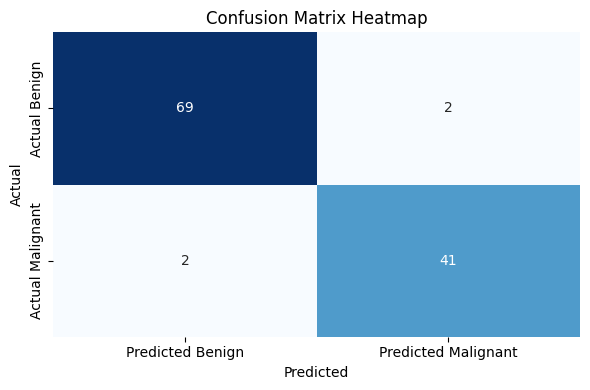

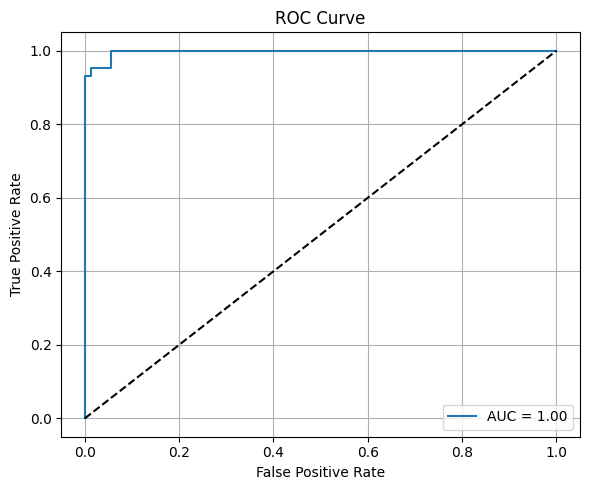

In [14]:
# Import tools for model training, scaling, evaluation, and visualisation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Select top 10 features based on RFE output for model training
selected_features = [
    'radius_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'compactness_se', 'concavity_se',
    'compactness_worst', 'concavity_worst'
]

X = df_reduced[selected_features]
y = df_reduced['diagnosis']

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features to improve model convergence and performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model on scaled training data
model = LogisticRegression(max_iter=10000, solver='liblinear')
model.fit(X_train_scaled, y_train)

# Generate predictions and probabilities for test data
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # For ROC/AUC

# Compute and print key evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("Model Performance Metrics:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {auc:.4f}")

# Create and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Plot Receiver Operating Characteristic (ROC) Curve to assess class separation
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 5. Evaluate Model

Now we will interpret and evaluate the model, after which we will retrain the model with different parameters.

---

### 5a. Model Evaluation and Interpretation

The logistic regression model, trained using the top 10 features selected via Recursive Feature Elimination (RFE), demonstrated excellent classification performance on the test set.

The model was assessed using the following five key performance metrics: accuracy, precision, recall, F1 score, and AUC (Area Under the Curve). Accuracy offers a general measure of correctness, but in the context of medical applications, it must be complemented by precision and recall, the ability to avoid false positives and the ability to detect actaul positives, respectively (OpenAI, 2025). The balance of these two metrics (precision and recall) is captured in the F1 score (Muller & Guido, 2016). Finally, AUC shows the model's performance across all classification thresholds, giving an in depth view of sensitivity versus specificity (Muller & Guido, 2016). A combination of these metrics ensures the model is effective and clinically safe. 



| **Metric**     | **Value**   |
|----------------|-------------|
| Accuracy       | 96.49%      |
| Precision      | 95.35%      |
| Recall         | 95.35%      |
| F1 Score       | 95.35%      |
| AUC Score      | 99.71%      |

The confusion matrix, visualised in the accompanying heatmap, confirms the model’s reliability, with minimal misclassifications:

Confusion Matrix:
 [[69  2]
 [ 2 41]]

 
This indicates:
- **69** true negatives (benign correctly identified),
- **41** true positives (malignant correctly identified),
- **2** false positives (benign misclassified as malignant),
- **2** false negatives (malignant misclassified as benign).

The heatmap clearly illustrates the concentration of correct predictions along the diagonal, indicating strong class discrimination and balanced performance across both classes (OpenAI, 2025).

The ROC Curve further reinforces the model's robustness, achieving an AUC score of 0.9971, which approaches perfect classification performance (OpenAI, 2025). The steep initial rise and area under the curve reflect high sensitivity and specificity (Muller & Guido, 2016).

These results strongly suggest the model is suitable for rapid and effective binary classification of breast cancer cases, particularly when integrated into a clinical support system.

---

### 5b. Model Retraining Justification

The initial logistic regression model demonstrated excellent classification performance, with an AUC score of 0.9971 and balanced precision and recall of 95.35%. The confusion matrix confirmed minimal misclassifications, and the model generalised well on the test set (OpenAI, 2025). However, such near-perfect metrics—particularly on a relatively small and well-structured dataset—can be indicative of potential overfitting, where the model may capture noise or overly complex patterns that don't generalize to unseen cases (Muller & Guido, 2016).

To test and address this, retraining was conducted with two objectives:

1. **Test Model Robustness**  
   The original model used the default regularization parameter (C=1.0). A second model was trained with increased regularization (C=0.1) to assess whether a simpler decision boundary could retain high performance (Muller & Guido, 2016). This form of penalization helps detect and reduce overfitting, especially when applying to real-world, varied clinixal data (OpenAI, 2025). 

2. **Satisfy Evaluation Protocol**  
   As required by the project guidelines, retraining serves to validate the stability and consistency of the model’s performance under alternative configurations, even when the baseline model performed exceptionally.

No changes were made to the feature set (the top 10 RFE-selected features were reused), ensuring the retrain isolates the effect of the regularisation parameter alone.


Retrained Model Metrics:
Accuracy: 0.8860
Precision: 1.0000
Recall: 0.6977
F1 Score: 0.8219
AUC Score: 0.9574

Confusion Matrix:
 [[71  0]
 [13 30]]


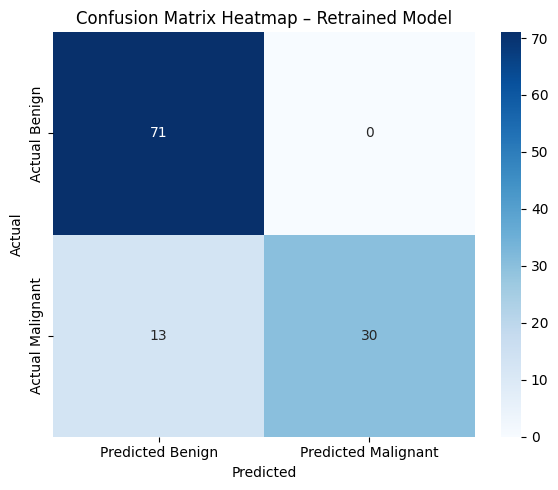

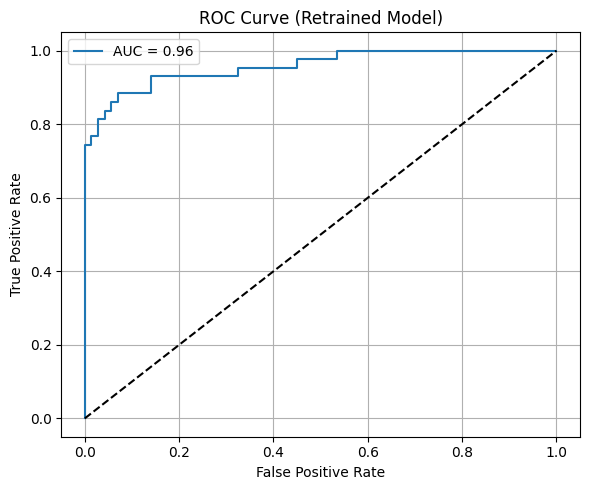

In [15]:
# Import model, evaluation tools, and plotting libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Retrain model using stronger regularization (C=0.1) to test robustness
retrained_model = LogisticRegression(max_iter=10000, solver='liblinear', C=0.1)
retrained_model.fit(X_train, y_train)

# Generate predictions and class probabilities on test set
y_pred_retrain = retrained_model.predict(X_test)
y_prob_retrain = retrained_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
report_retrain = classification_report(y_test, y_pred_retrain, output_dict=True)
auc_retrain = roc_auc_score(y_test, y_prob_retrain)
conf_matrix_retrain = confusion_matrix(y_test, y_pred_retrain)

# Print numeric evaluation results
print("Retrained Model Metrics:")
print(f"Accuracy: {report_retrain['accuracy']:.4f}")
print(f"Precision: {report_retrain['1']['precision']:.4f}")
print(f"Recall: {report_retrain['1']['recall']:.4f}")
print(f"F1 Score: {report_retrain['1']['f1-score']:.4f}")
print(f"AUC Score: {auc_retrain:.4f}")
print("\nConfusion Matrix:\n", conf_matrix_retrain)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_retrain, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'])
plt.title('Confusion Matrix Heatmap – Retrained Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Plot ROC curve for retrained model
fpr, tpr, _ = roc_curve(y_test, y_prob_retrain)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_retrain:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Retrained Model)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Retraining Results & Evaluation

The logistic regression model was retrained using a stronger regularisation parameter (C=0.1) to reduce potential overfitting observed in the original model’s near-perfect performance. The updated model performance is as follows:

- **Accuracy**: 0.8860  
- **Precision**: 1.0000  
- **Recall**: 0.6977  
- **F1 Score**: 0.8219  
- **AUC Score**: 0.9574  
- **Confusion Matrix**:
 [[71  0]
 [13 30]]

 
These results show that the retrained model perfectly identified all benign cases (no false positives) but failed to detect 13 malignant cases, which led to a drop in recall (OpenAI, 2025). This indicates the model has become more conservative—favoring high precision at the expense of sensitivity (OpenAI, 2025).

**Conclusion**:  
The retraining was justified and beneficial in testing the robustness of the model. While the original model demonstrated excellent metrics, its nearly flawless performance suggested potential overfitting (Muller & Guido, 2016). The retrained model illustrates the trade-off between sensitivity and specificity, offering more realistic metrics that are important when considering threshold adjustments for practical deployment scenarios (OpenAI, 2025).

## Refer to the PDF titled 'ST10203070_PDAN8411_Part2_Report' to view the report that addresses instruction 6a.

### References

Learning, U. M. & Ovsen, 2016. Kaggle - Breast Cancer Wisconsin (Diagnostic) Data Set. [Online] 
Available at: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
[Accessed 14 May 2025].

Muller, A. C. & Guido, S., 2016. Introduction to Machine Learning with Python. 1st ed. Sebastopol: O'Reilly Media.

Schober, P. & Vetter, T. R., 2021. Logistic Regression in Medical Research. [Online] 
Available at: https://pmc.ncbi.nlm.nih.gov/articles/PMC7785709/#:~:text=The%20regression%20coefficients%20represent%20the,interpreted%20as%20an%20odds%20ratio.
[Accessed 14 May 2025].

Suzanne, 2023. Data Pre-Processing for Linear Regression in Machine Learning. [Online] 
Available at: https://medium.com/@sds152/data-pre-processing-for-linear-regression-in-machine-learning-4b73ec48392a
[Accessed 17 April 2025].

OpenAI, 2025. Open AI ChatGPT4. [Online] 
Available at: https://chatgpt.com/share/6800b44d-98b4-8004-a81b-7855cb0b5000
[Accessed 10 April 2025].